In [125]:
# Making all necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling

# Add a cell to not display future warnings
import warnings
warnings.filterwarnings("ignore")

# Exploration

In [179]:
# Reading a first dataset to understand it
dataset_folder = 'Datasets/'
csv_file = 'trafic-annuel-entrant-par-station-du-reseau-ferre-2016.csv'
csv_location = dataset_folder + csv_file
freq = pd.read_csv(csv_location, sep = ';')


# Separating dataFrame in 2 df depending on station types
RER = freq[freq['Réseau']=='RER']
metro = freq[freq['Réseau']=='Métro']


# Working on metro
lines_list = metro['Correspondance_1'].unique()
print(lines_list)

['1' '3' '5' '6' '7' '8' '2' '4' '10' '13' '9' '3bis' '7bis' '12' '14'
 '11']


In [180]:
# Studying correspondance_values
for i in range(4):
    col = 'Correspondance_' + str(i +1)
    print(col)
    print(metro[col].unique())

Correspondance_1
['1' '3' '5' '6' '7' '8' '2' '4' '10' '13' '9' '3bis' '7bis' '12' '14'
 '11']
Correspondance_2
['14' '5' '6' '9' '2' nan '12' '13' '10' '4' '11' '7' '8' '3bis' '3'
 '7bis']
Correspondance_3
['A' '8' '7' nan '6' '14' '7bis' '12' '9' '10']
Correspondance_4
[nan  9. 13. 11.]


In [182]:
# Transforming values into numbers
metro.replace('3bis', 3.5, inplace=True)
metro.replace('7bis', 7.5, inplace=True)
metro.replace('A', 0, inplace=True)

# And transoforming Correspondance series into numeric series
for i in range(4):
    col = 'Correspondance_' + str(i +1)
    metro[col] = pd.to_numeric(metro[col])
    
# Displaying columns name
print(metro.columns)

Index(['Rang', 'Réseau', 'Station', 'Trafic', 'Correspondance_1',
       'Correspondance_2', 'Correspondance_3', 'Correspondance_4',
       'Correspondance_5', 'Ville', 'Arrondissement pour Paris'],
      dtype='object')


In [163]:
# Creating a dictionnary to specify the station of each lines
lines_dict = {}

# Filling it
for line in lines_list:
      
    # Mapping line to a numeric value
    if line == '3bis':
        line = 3.5
    elif line == '7bis':
        line = 7.5
    else:
        line = float(line)

    # Fillling the dict
    stations = []
    for i in range(4):
        col = 'Correspondance_' + str(i +1)
        stations += list(metro[metro[col]==float(line)]['Station'].unique())
    
    lines_dict[line] = {'total_people':0, 'nb_stations':len(stations), 'stations':stations}

In [ ]:
# Display information
for line, stations in stations_dict.items():
    print('LINE N°', line, '(', len(stations),'stations). \n')
    print(', '.join(stations).lower(), '\n')

In [304]:
# Counting people per line
for line in lines_dict.keys():   
    people = 0
    for station in lines_dict[line]['stations']:
        people += int(metro[metro['Station'] == station]['Trafic'].tolist()[0])
    lines_dict[line]['total_people'] = people

In [305]:
# Displaying results
for line, value in lines_dict.items():
    print(line, '\t', value['total_people'])

1.0 	 217255582
3.0 	 163245248
5.0 	 185094089
6.0 	 148901283
7.0 	 182841154
8.0 	 176751715
2.0 	 134200927
4.0 	 240291368
10.0 	 69930227
13.0 	 200097672
9.0 	 233699883
3.5 	 11993810
7.5 	 14654754
12.0 	 172654910
14.0 	 84414502
11.0 	 68660680


# Script

In [293]:
# Load
dataset_folder = 'Datasets/'
csv_file = 'trafic-annuel-entrant-par-station-du-reseau-ferre-2016.csv'
csv_location = dataset_folder + csv_file
freq = pd.read_csv(csv_location, sep = ';')
metro = freq[freq['Réseau']=='Métro']

# Clean
metro.replace('3bis', 3.5, inplace=True)
metro.replace('7bis', 7.5, inplace=True)
metro.replace('A', 0, inplace=True)

for i in range(4):
    col = 'Correspondance_' + str(i +1)
    metro[col] = pd.to_numeric(metro[col])

metro.head()

Rang Réseau                Station    Trafic  Correspondance_1  \
0     3  Métro           GARE DE LYON  36352115               1.0   
1     6  Métro             REPUBLIQUE  18340798               3.0   
2    13  Métro         PLACE D'ITALIE  11462253               5.0   
3    16  Métro  FRANKLIN D. ROOSEVELT  10899310               1.0   
4    24  Métro                 NATION   8792715               1.0   

   Correspondance_2  Correspondance_3  Correspondance_4  Correspondance_5  \
0              14.0               0.0               NaN               NaN   
1               5.0               8.0               9.0              11.0   
2               6.0               7.0               NaN               NaN   
3               9.0               NaN               NaN               NaN   
4               2.0               6.0               9.0               NaN   

   Ville  Arrondissement pour Paris  
0  Paris                       12.0  
1  Paris                       11.0  
2  Paris                       13.0  
3  Paris                        8.0  
4  Paris                       12.0

In [316]:
def get_lines_name():
    lines = np.array([float(i) for i in metro['Correspondance_1'].unique()])
    lines.sort(axis=0)
    return lines
    

def stations_on_line(line):
    stations = []
    for i in range(4):
        col = 'Correspondance_' + str(i +1)
        stations += list(metro[metro[col]==float(line)]['Station'].unique())
    return stations

def stations_per_line(line):
    return len(stations_on_line(line))

def nb_people_per_station(station):
    
    # Call by name
    if type(station)==str:
        if station in metro['Station'].unique():
            people = int(metro[metro['Station'] == station]['Trafic'].tolist()[0])
        else:
            print('Station does not exist, check name.')
            people = 0
    
    # Call by index
    if type(station)==int:
        if station in metro.index:
            
            people = int(metro.loc[station]['Trafic'])
        else:
            print('Station does not exist, check number.')
            people = 0
            
    return people


def nb_people_per_line(line):
    list_of_stations = stations_on_line(line)
    people_line = 0
    for station in list_of_stations:
        people_line += nb_people_per_station(station)
    return people_line

    


def get_station_intersection(station, line=None):
    return None

In [309]:
get_lines_name()

array([ 1. ,  2. ,  3. ,  3.5,  4. ,  5. ,  6. ,  7. ,  7.5,  8. ,  9. ,
       10. , 11. , 12. , 13. , 14. ])

In [317]:
stations_per_line(2)

26

# Visualization : define what to do

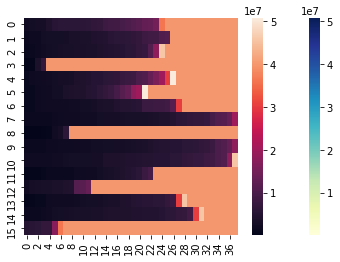

In [362]:
table = []
max_len = 0
for line in get_lines_name():
    row = []
    for station in stations_on_line(line):
        row.append(nb_people_per_station(station))
    if len(row)>max_len:
        max_len = len(row)
    
    row = np.array(row)
    row.sort()
    row = list(row)
    table.append(row)
    
    
for i in table:
    if len(i)< max_len:
        i += [40000000 for j in range(max_len-len(i))]

sns.heatmap(table, cmap="YlGnBu")
sns.heatmap(table)

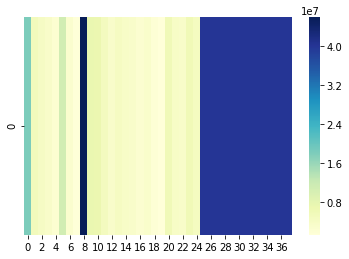

In [355]:
sns.heatmap([table[2]], cmap="YlGnBu")

In [356]:
flights = sns.load_dataset("flights")

In [357]:
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

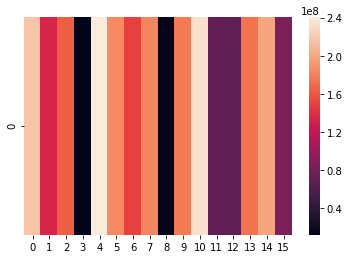

In [358]:
a= []
for line in get_lines_name():
    a.append(nb_people_per_line(line))
sns.heatmap([a])